In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from random import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import graphviz
# https://www2.graphviz.org/Packages/stable/windows/10/cmake/Release/x64/
# after installation, open a command prompt in adminstrator mode and type the following command:
# dot -c

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\18174\\OneDrive - UNT System'

In [5]:
os.chdir("C:\\Users\\18174\\OneDrive - UNT System\\Desktop\\New folder")

In [6]:
modelDF= pd.read_csv('modelDF.csv')

In [7]:
modelDF

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,False,False,True,False,1,False,True,29.85,29.85,...,True,False,False,True,False,False,False,False,True,False
1,1,True,False,False,False,34,True,False,56.95,1889.50,...,True,False,False,False,True,False,False,False,False,True
2,2,True,False,False,False,2,True,True,53.85,108.15,...,True,False,False,True,False,False,False,False,False,True
3,3,True,False,False,False,45,False,False,42.30,1840.75,...,True,False,False,False,True,False,True,False,False,False
4,4,False,False,False,False,2,True,True,70.70,151.65,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,True,False,True,True,24,True,True,84.80,1990.50,...,False,False,True,False,True,False,False,False,False,True
7039,7039,False,False,True,True,72,True,True,103.20,7362.90,...,False,False,True,False,True,False,False,True,False,False
7040,7040,False,False,True,True,11,False,True,29.60,346.45,...,True,False,False,True,False,False,False,False,True,False
7041,7041,True,True,True,False,4,True,True,74.40,306.60,...,True,False,False,True,False,False,False,False,False,True


In [8]:
pd.set_option('display.max_columns', None)
modelDF = pd.read_csv(r'modelDF.csv')
print(modelDF.dtypes)
modelDF

Unnamed: 0                                   int64
gender                                        bool
SeniorCitizen                                 bool
Partner                                       bool
Dependents                                    bool
tenure                                       int64
PhoneService                                  bool
PaperlessBilling                              bool
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                         bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No                             bool
OnlineSecurity_No internet service            bool
OnlineSecurity_Yes             

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,False,False,True,False,1,False,True,29.85,29.85,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,1,True,False,False,False,34,True,False,56.95,1889.50,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True
2,2,True,False,False,False,2,True,True,53.85,108.15,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
3,3,True,False,False,False,45,False,False,42.30,1840.75,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False
4,4,False,False,False,False,2,True,True,70.70,151.65,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,True,False,True,True,24,True,True,84.80,1990.50,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True
7039,7039,False,False,True,True,72,True,True,103.20,7362.90,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False
7040,7040,False,False,True,True,11,False,True,29.60,346.45,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
7041,7041,True,True,True,False,4,True,True,74.40,306.60,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True


In [9]:
Y = modelDF['Churn'].values
X = modelDF.drop(labels = ['Churn',\
                           'Unnamed: 0'],\
#                            'OnlineBackup_No internet service','OnlineSecurity_No internet service',\
#                            'DeviceProtection_No internet service','TechSupport_No internet service',\
#                            'StreamingTV_No internet service','StreamingMovies_No internet service',\
#                            'MonthlyCharges','TotalCharges','gender','Partner'],\
                 axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

[Text(106.23461538461538, 205.35999999999999, 'X[33] <= 0.5\ngini = 0.39\nsamples = 7043\nvalue = [5174, 1869]'),
 Text(34.33846153846154, 181.2, 'X[7] <= 93.675\ngini = 0.126\nsamples = 3168\nvalue = [2954, 214]'),
 Text(17.16923076923077, 157.04, 'X[34] <= 0.5\ngini = 0.076\nsamples = 2390\nvalue = [2295, 95]'),
 Text(8.584615384615384, 132.88, 'gini = 0.027\nsamples = 1315\nvalue = [1297, 18]'),
 Text(25.753846153846155, 132.88, 'gini = 0.133\nsamples = 1075\nvalue = [998, 77]'),
 Text(51.50769230769231, 157.04, 'X[34] <= 0.5\ngini = 0.259\nsamples = 778\nvalue = [659, 119]'),
 Text(42.92307692307692, 132.88, 'gini = 0.145\nsamples = 380\nvalue = [350, 30]'),
 Text(60.09230769230769, 132.88, 'gini = 0.347\nsamples = 398\nvalue = [309, 89]'),
 Text(178.13076923076923, 181.2, 'X[13] <= 0.5\ngini = 0.489\nsamples = 3875\nvalue = [2220, 1655]'),
 Text(111.6, 157.04, 'X[4] <= 5.5\ngini = 0.405\nsamples = 1747\nvalue = [1254, 493]'),
 Text(77.26153846153846, 132.88, 'X[24] <= 0.5\ngini = 

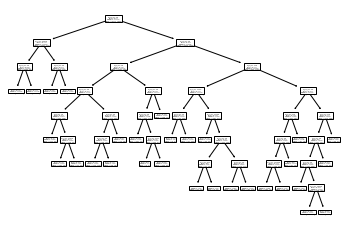

In [10]:
model = tree.DecisionTreeClassifier(max_leaf_nodes = 30)
model = model.fit(X,Y)
tree.plot_tree(model)

In [11]:
prediction = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.8041163946061036


In [12]:
Y = modelDF['Churn'].values
Z = modelDF.drop(labels = ['Churn',\
                           'Unnamed: 0',\
                           'OnlineBackup_No internet service','OnlineSecurity_No internet service',\
                           'DeviceProtection_No internet service','TechSupport_No internet service',\
                           'StreamingTV_No internet service','StreamingMovies_No internet service',\
                           'MonthlyCharges','TotalCharges','gender','Partner','tenure'],\
                 axis = 1)

Z_train, Z_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=101)

[Text(126.74571428571429, 205.35999999999999, 'X[22] <= 0.5\ngini = 0.39\nsamples = 7043\nvalue = [5174, 1869]'),
 Text(47.82857142857143, 181.2, 'X[8] <= 0.5\ngini = 0.126\nsamples = 3168\nvalue = [2954, 214]'),
 Text(19.13142857142857, 157.04, 'X[23] <= 0.5\ngini = 0.069\nsamples = 2200\nvalue = [2121, 79]'),
 Text(9.565714285714286, 132.88, 'gini = 0.026\nsamples = 1266\nvalue = [1249, 17]'),
 Text(28.697142857142858, 132.88, 'X[21] <= 0.5\ngini = 0.124\nsamples = 934\nvalue = [872, 62]'),
 Text(19.13142857142857, 108.72, 'gini = 0.08\nsamples = 675\nvalue = [647, 28]'),
 Text(38.26285714285714, 108.72, 'gini = 0.228\nsamples = 259\nvalue = [225, 34]'),
 Text(76.52571428571429, 157.04, 'X[24] <= 0.5\ngini = 0.24\nsamples = 968\nvalue = [833, 135]'),
 Text(66.96000000000001, 132.88, 'X[20] <= 0.5\ngini = 0.311\nsamples = 539\nvalue = [435, 104]'),
 Text(57.394285714285715, 108.72, 'gini = 0.358\nsamples = 403\nvalue = [309, 94]'),
 Text(76.52571428571429, 108.72, 'X[27] <= 0.5\ngini 

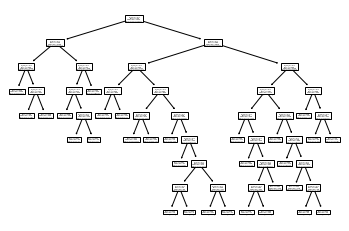

In [13]:
model = tree.DecisionTreeClassifier(max_leaf_nodes = 30)
model = model.fit(Z,Y)
tree.plot_tree(model)

In [14]:
prediction = model.predict(Z_test)
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.7934705464868701
